# Problem 1
- 1.1:  
result printed under code section.
- 1.2:  
changed part: x2b = -(self.theta[0] + self.theta[1]*x1b)/self.theta[2];
- 1.3:  
result printed under code section.
- 1.4:  
result printed under code section.
- 1.5:  
[σ(θ^T\*x)-y]\*x1  
[σ(θ^T\*x)-y]\*x2  
[σ(θ^T\*x)-y]\*x3  
proof:  
ln(x) = 1/x => -[ y/σ(θ^T\*x) - (1-y)/(1-σ(θ^T\*x)) ] \* d/dθ(σ(θ^T\*x))  
= -[ y/σ(θ^T\*x) - (1-y)/(1-σ(θ^T\*x)) ] \* σ(θ^T\*x)\*[1-σ(θ^T\*x)] xi  
= -[y-σ(θ^T\*x)] \* xi
= [σ(θ^T\*x)-y] \* x1
- 1.6:  
    def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None, plotname="",regularization=False,alpha=2):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        tmpname = plotname
        if regularization: tmpname += ' with regularization'
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            ji = 0
            for i in np.random.permutation(M):
                ri    = np.dot(XX[i], self.theta);     # TODO: compute linear response r(x)
                gradi = np.dot(XX[i], 1/(1 + np.exp(-ri)) - YY[i]);     # TODO: compute gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step
                ji += (YY[i] * np.log(1/(1 + np.exp(-ri))) + (1-YY[i])*np.log(1 - (1/(1 + np.exp(-ri)))))

            J01.append( self.err(X,Y) )
            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            if regularization:
                ji -= alpha * np.dot(self.theta,self.theta)
            Jsur = -ji/M
            Jnll.append(Jsur) # TODO evaluate the current NLL loss
            plt.figure(tmpname+' covergence of surrogate loss and error rate');
            plt.title(tmpname+' covergence of surrogate loss and error rate');
            plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            if N==2:
                plt.figure(tmpname+' final converged classifier with the data');
                plt.title(tmpname+' final converged classifier with the data');
                self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            # plt.pause(.01);                    # let OS draw the plot

            ## For debugging: you may want to print current parameters & losses
            #print(self.theta, ' => ', Jnll[-1], ' / ', J01[-1])
            #raw_input()   # pause for keystroke
            # input("Press Enter to continue...") #python 3 version of raw_input

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            if epoch > stopEpochs: break
            # or if Jnll not changing between epochs ( < stopTol )
            if len(Jnll) >= 2:
                done = abs(Jnll[-1] - Jnll[-2]) < stopTol
                if done:
                    print(plotname + " stopped at epoch: ", epoch)
                    #plt.show()
            else:
                done = False
- 1.7:  
Im using the default parameter for stepsize and stopTol.  
plot and number of epochs and trained theta are printed under code section.
- 1.8
I only added the regularization offset to Jnll but did nothing else. I think i must have missed something.  
The performance is bad, only when alpha is extremely small it can kind of converge.
plot and number of epochs and trained theta are printed under code section.

<IPython.core.display.Javascript object>


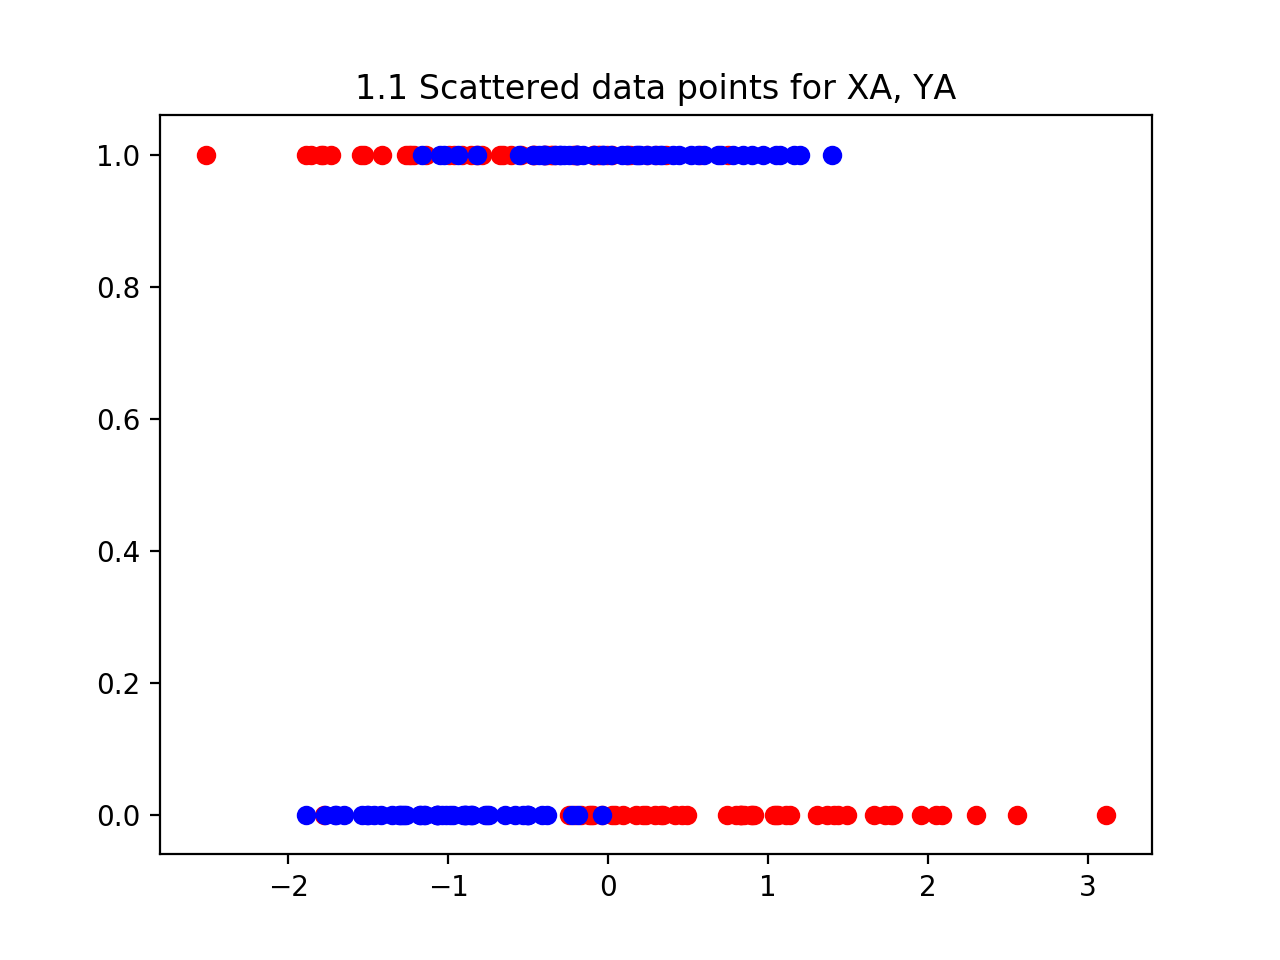

<IPython.core.display.Javascript object>


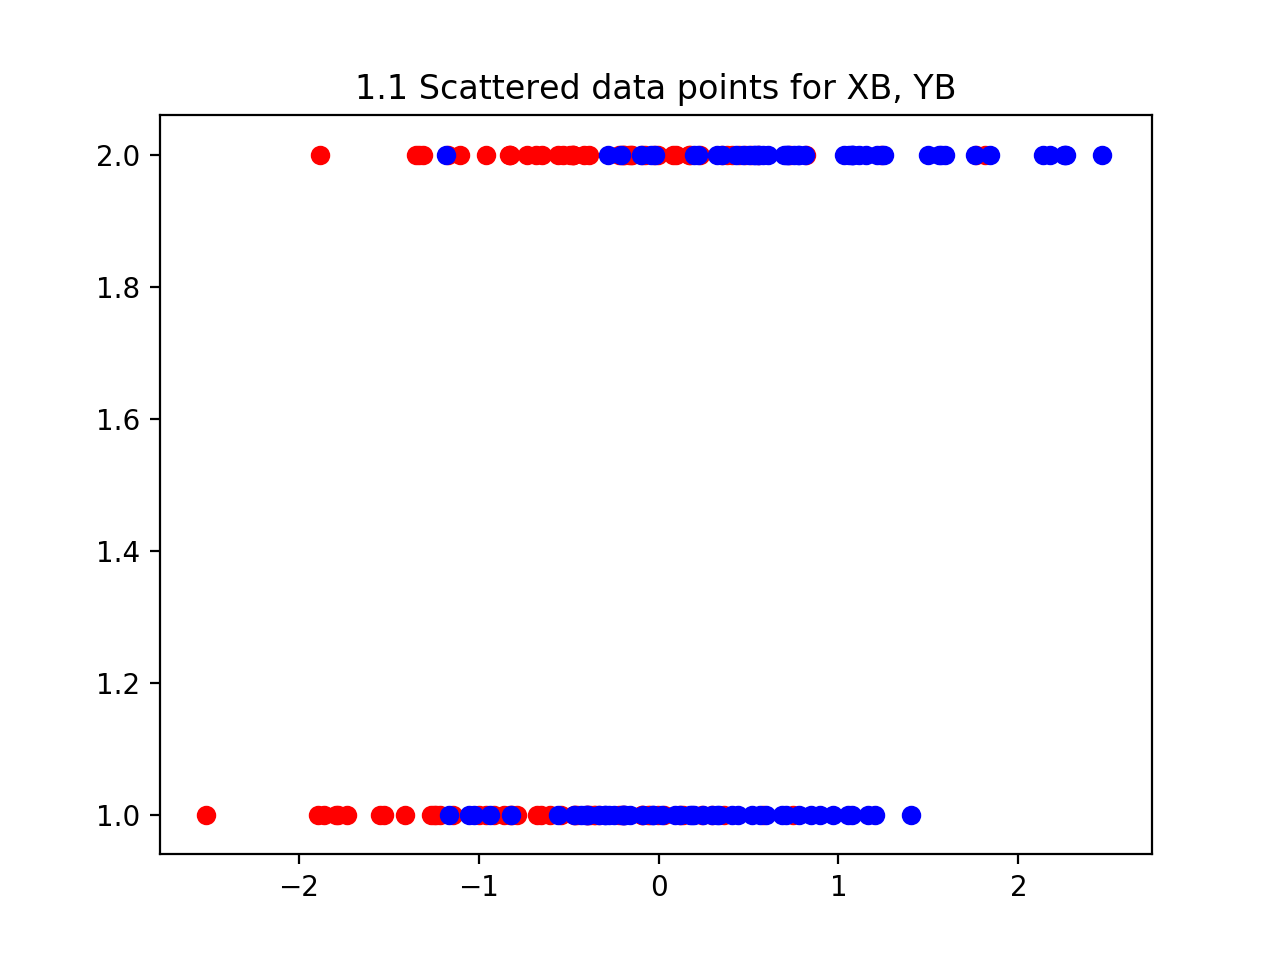

<IPython.core.display.Javascript object>


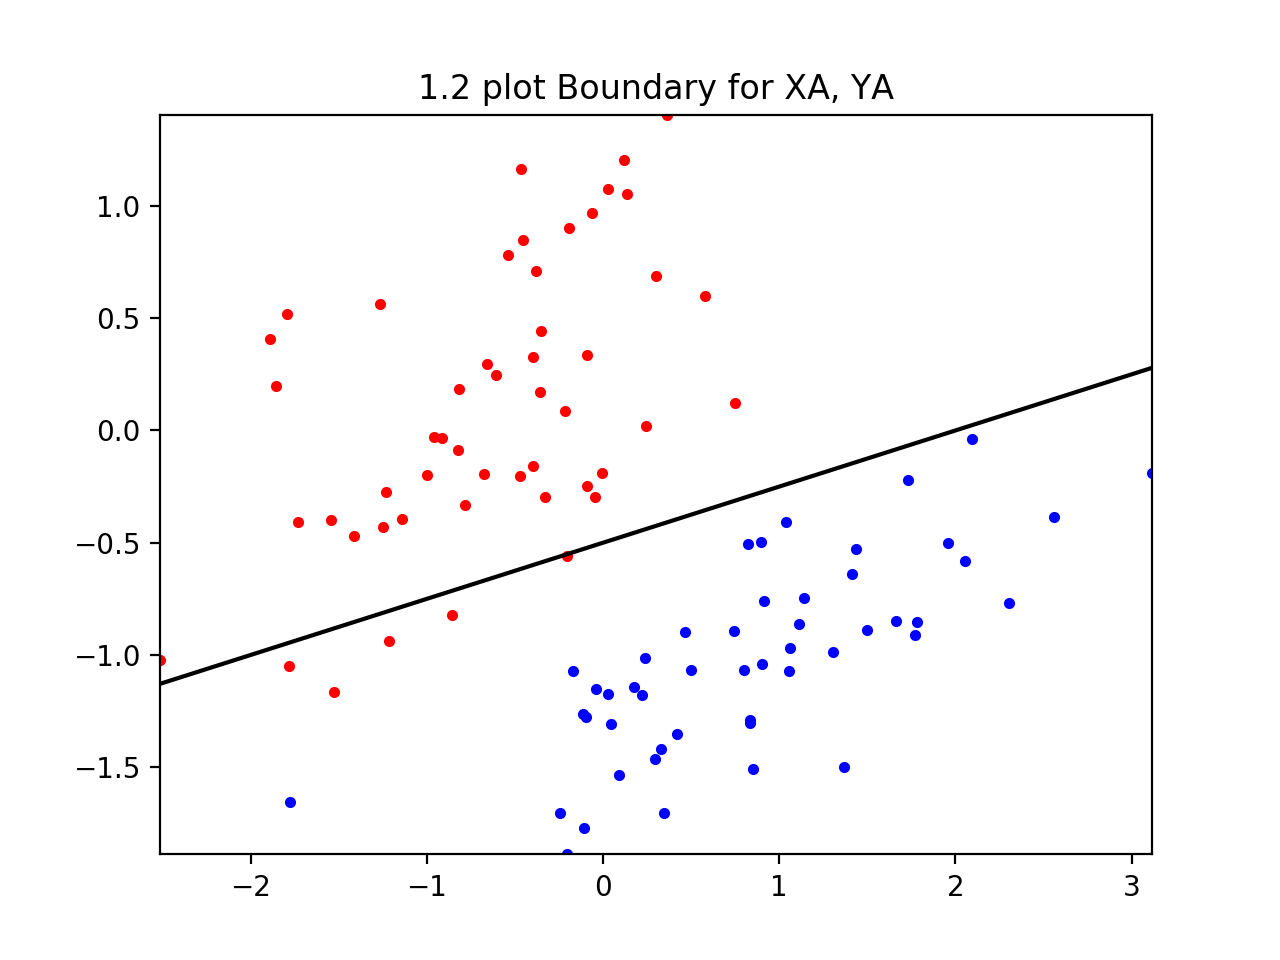

<IPython.core.display.Javascript object>


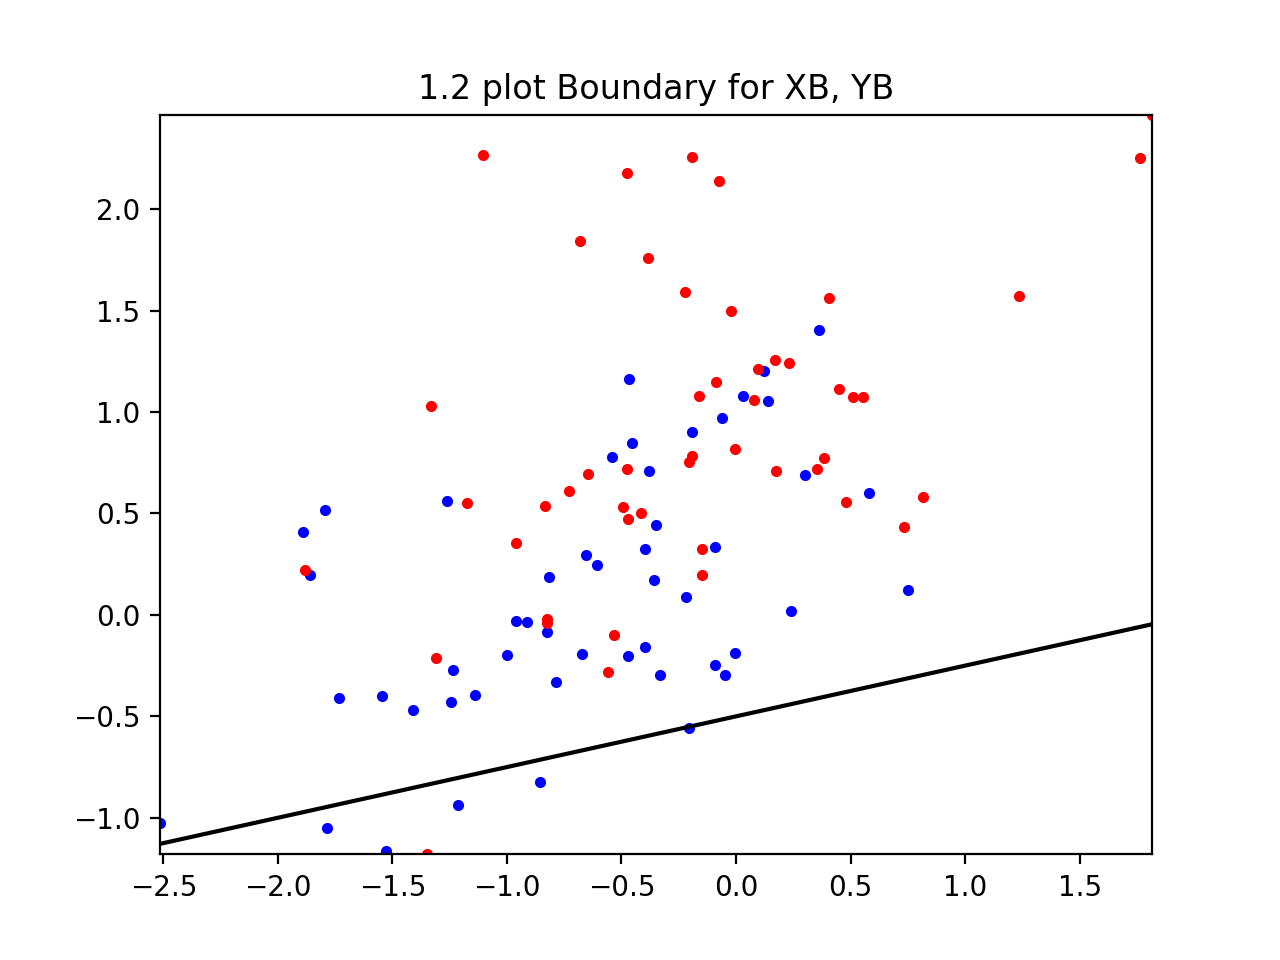

1.3 error for set A:  0.050505050505050504
1.3 error for set B:  0.46464646464646464


<IPython.core.display.Javascript object>


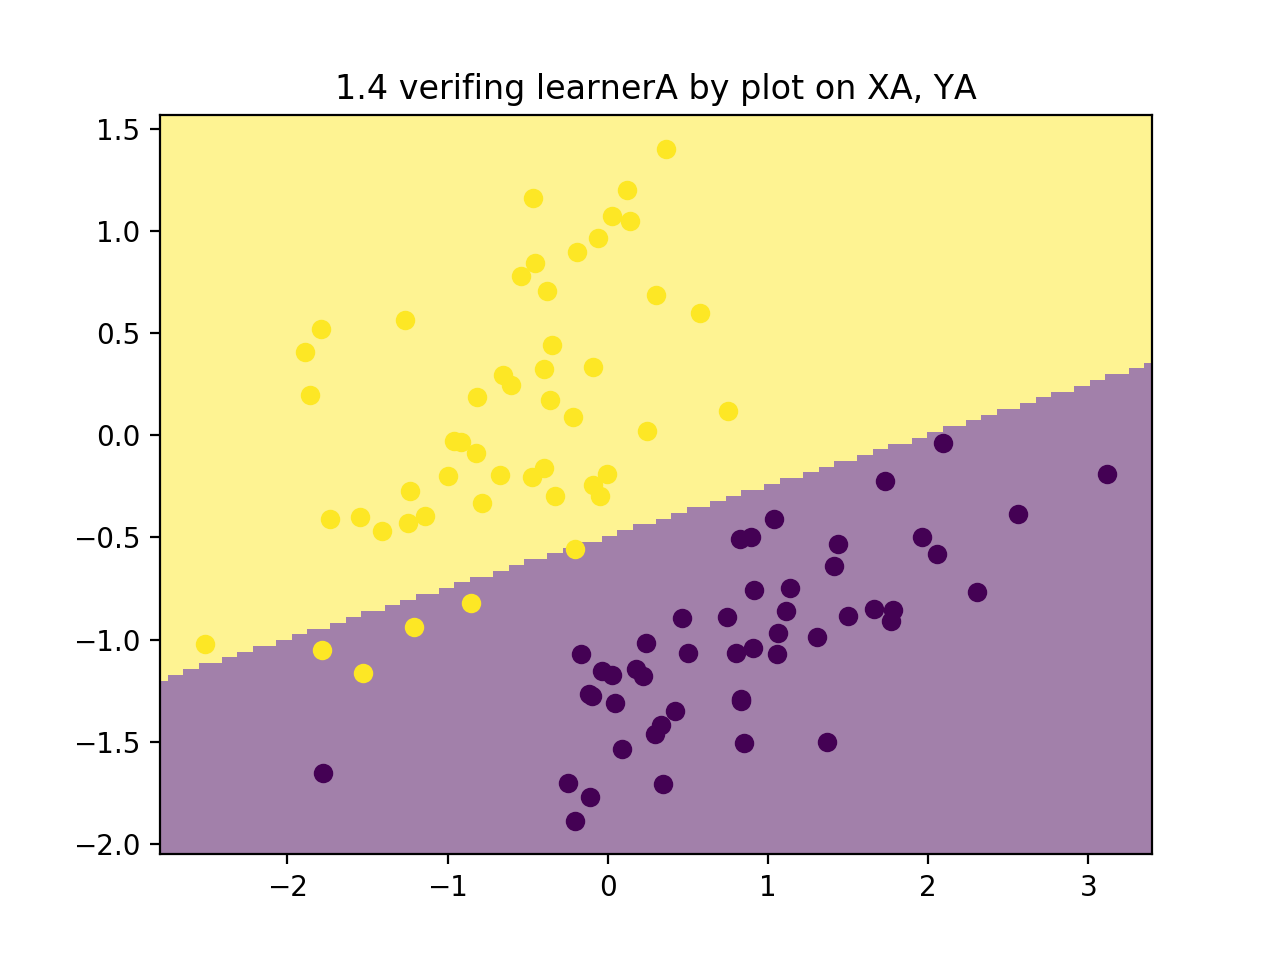

<IPython.core.display.Javascript object>


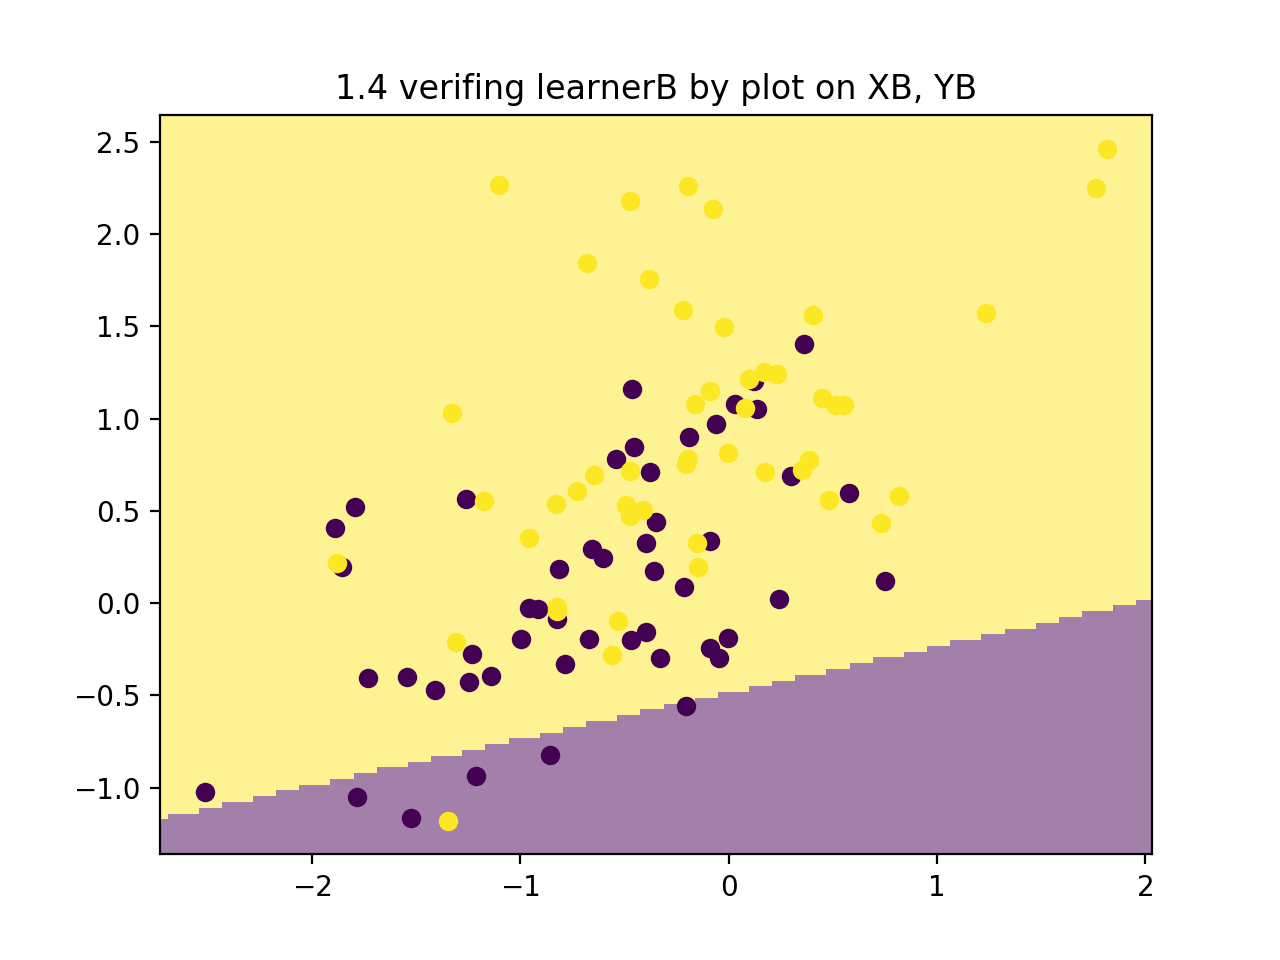

<IPython.core.display.Javascript object>


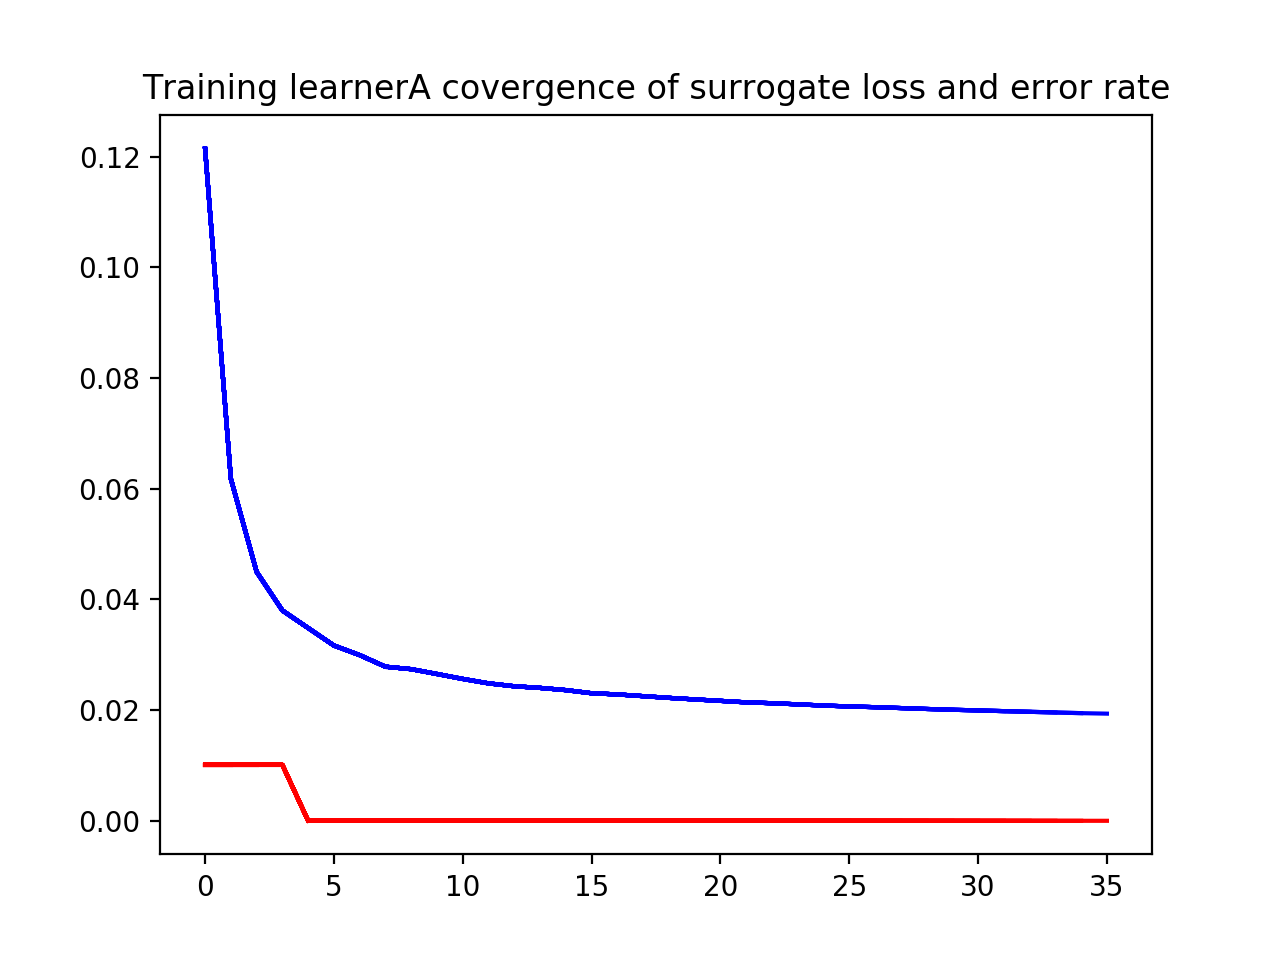

<IPython.core.display.Javascript object>


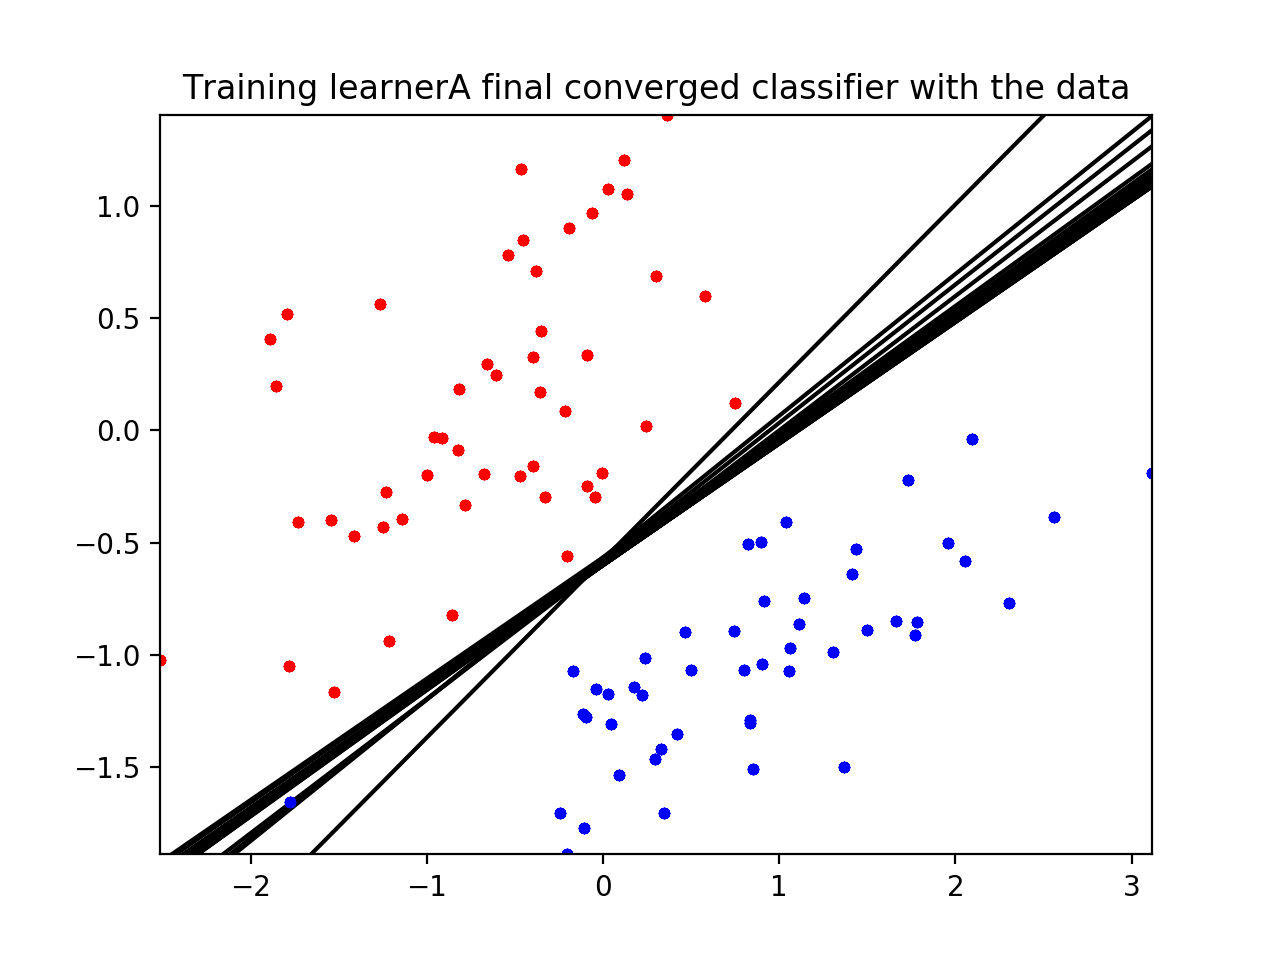

Training learnerA stopped at epoch:  36
Trained theta from learnerA:  [ 4.44607932 -4.00999821  7.40710032]


<IPython.core.display.Javascript object>


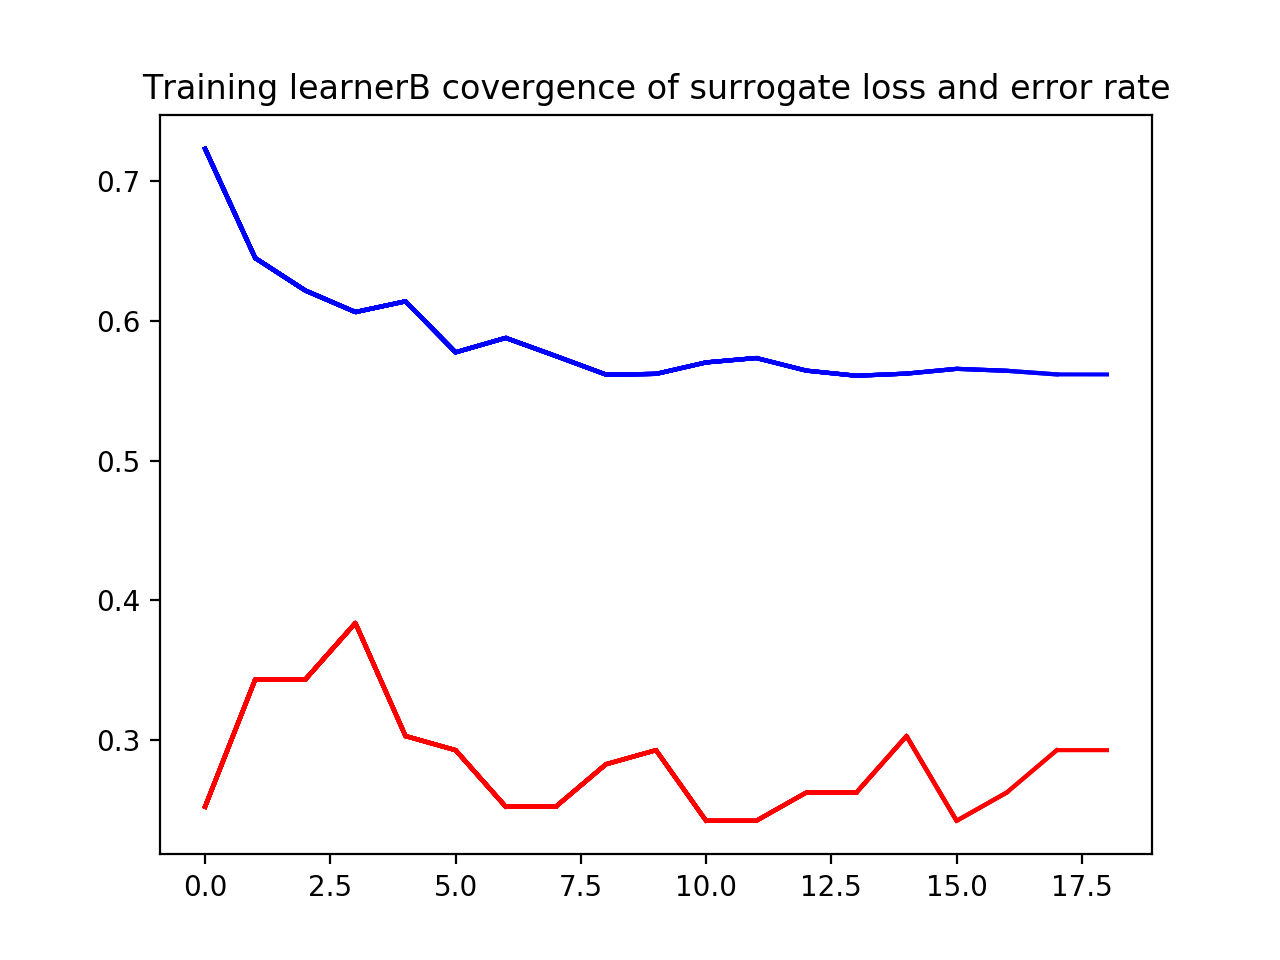

<IPython.core.display.Javascript object>


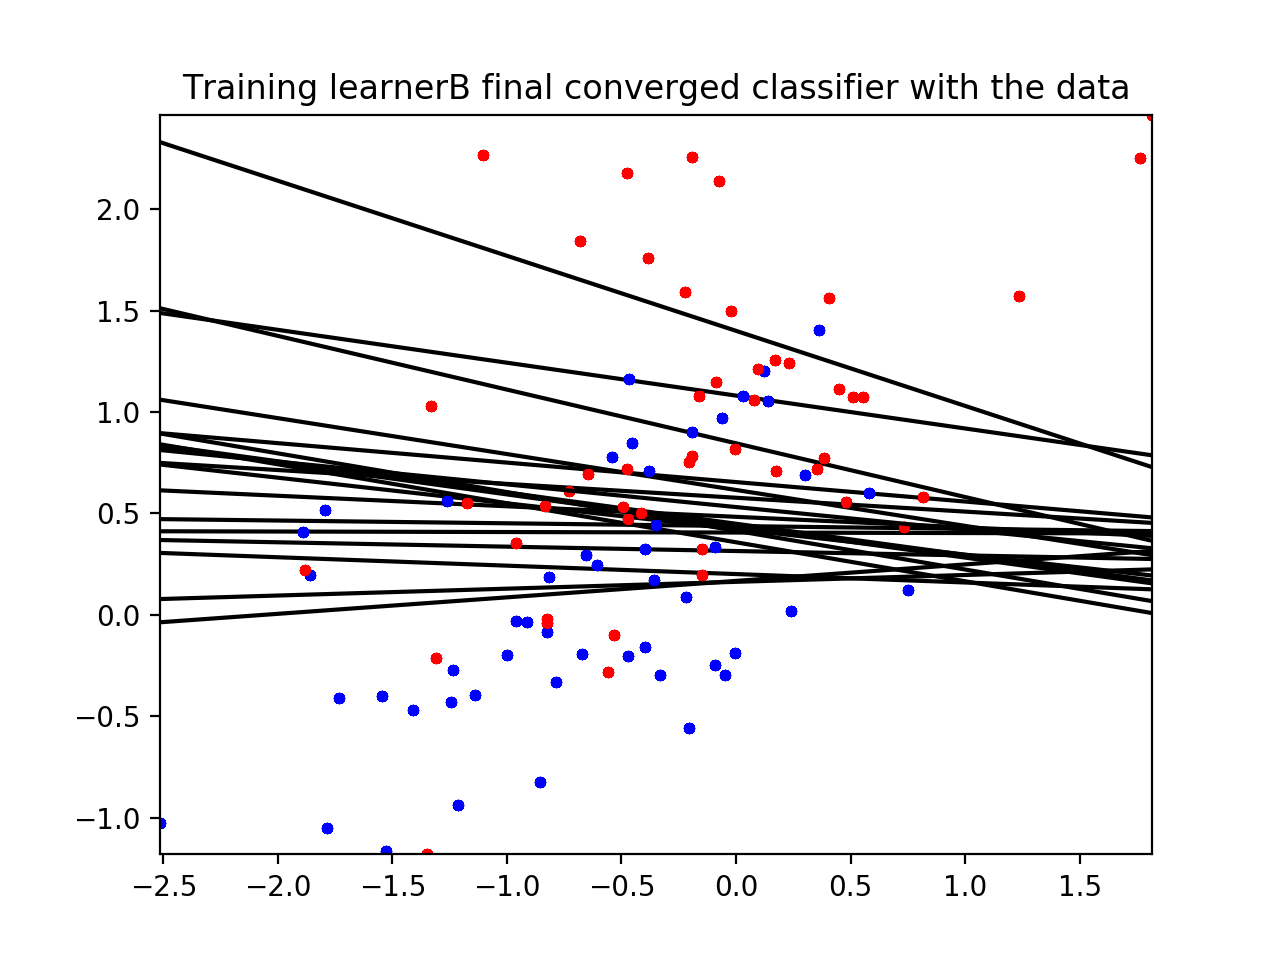

Training learnerB stopped at epoch:  19
Trained theta from learnerB:  [-0.86120213  0.18117841  1.62007838]


<IPython.core.display.Javascript object>


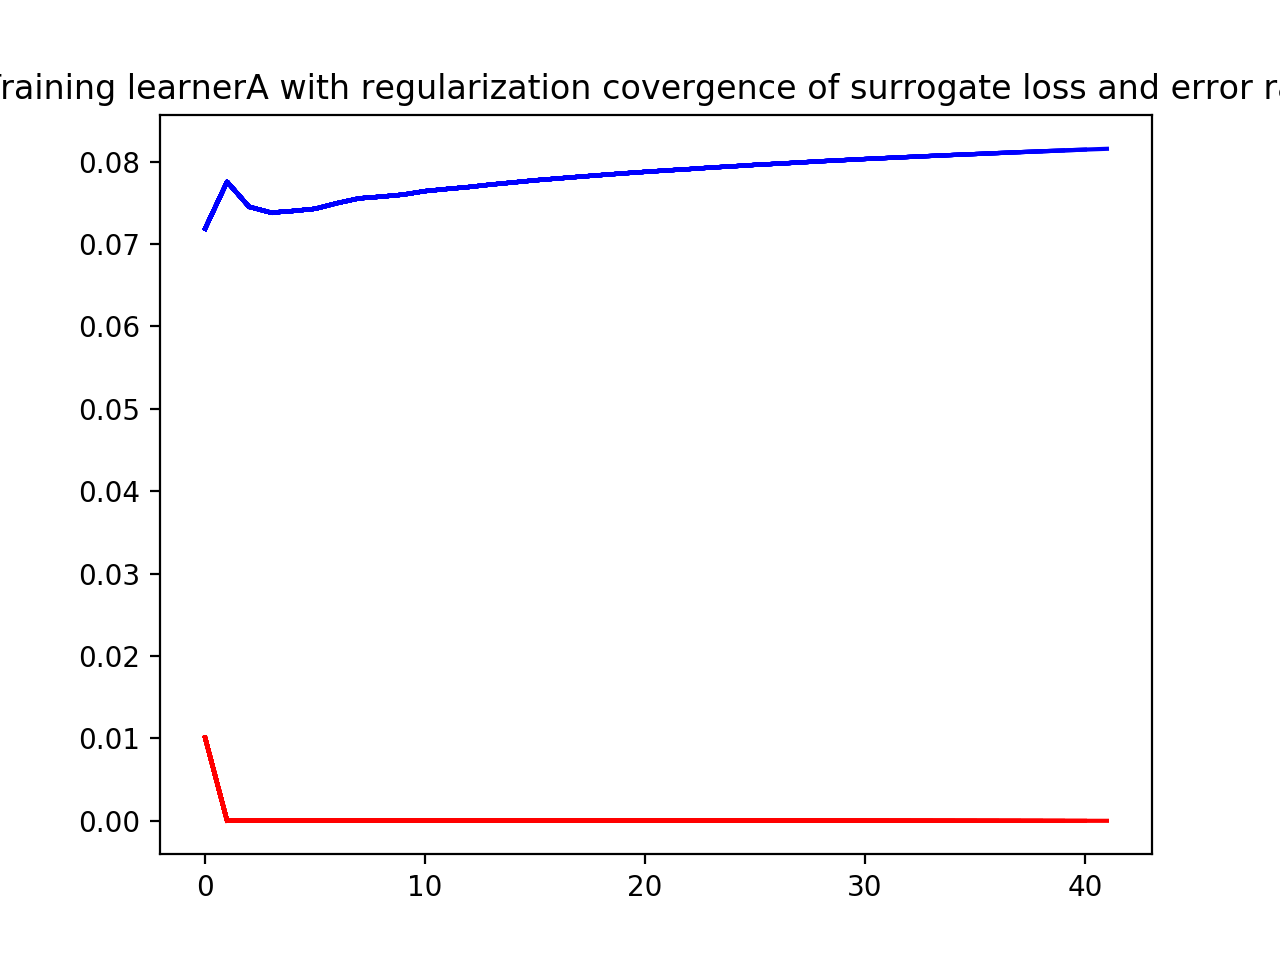

<IPython.core.display.Javascript object>


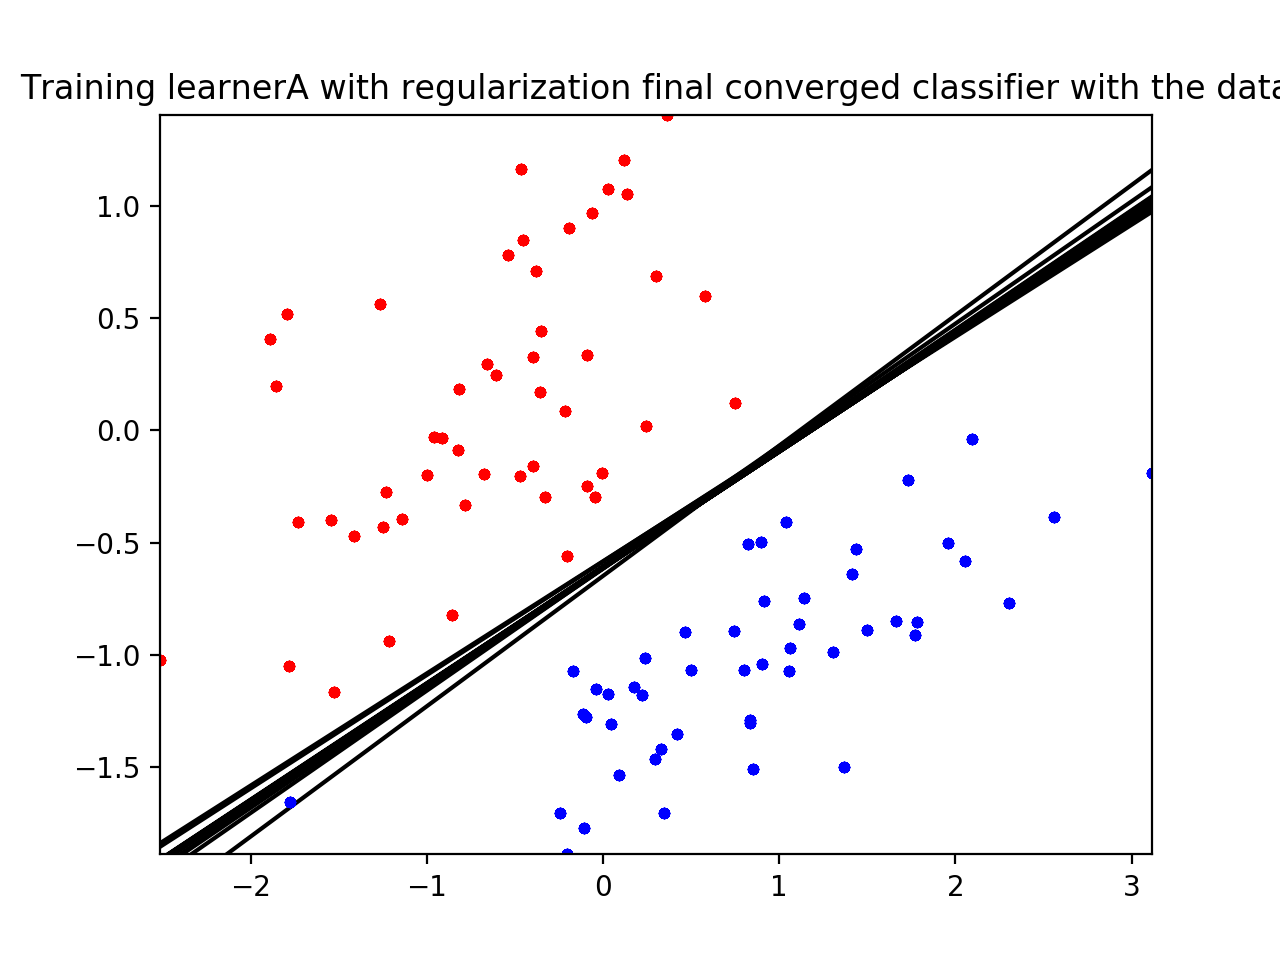

Training learnerA stopped at epoch:  42
Trained theta from learnerA with regularization:  [ 5.59883103 -4.73459271  9.13829043]


<IPython.core.display.Javascript object>


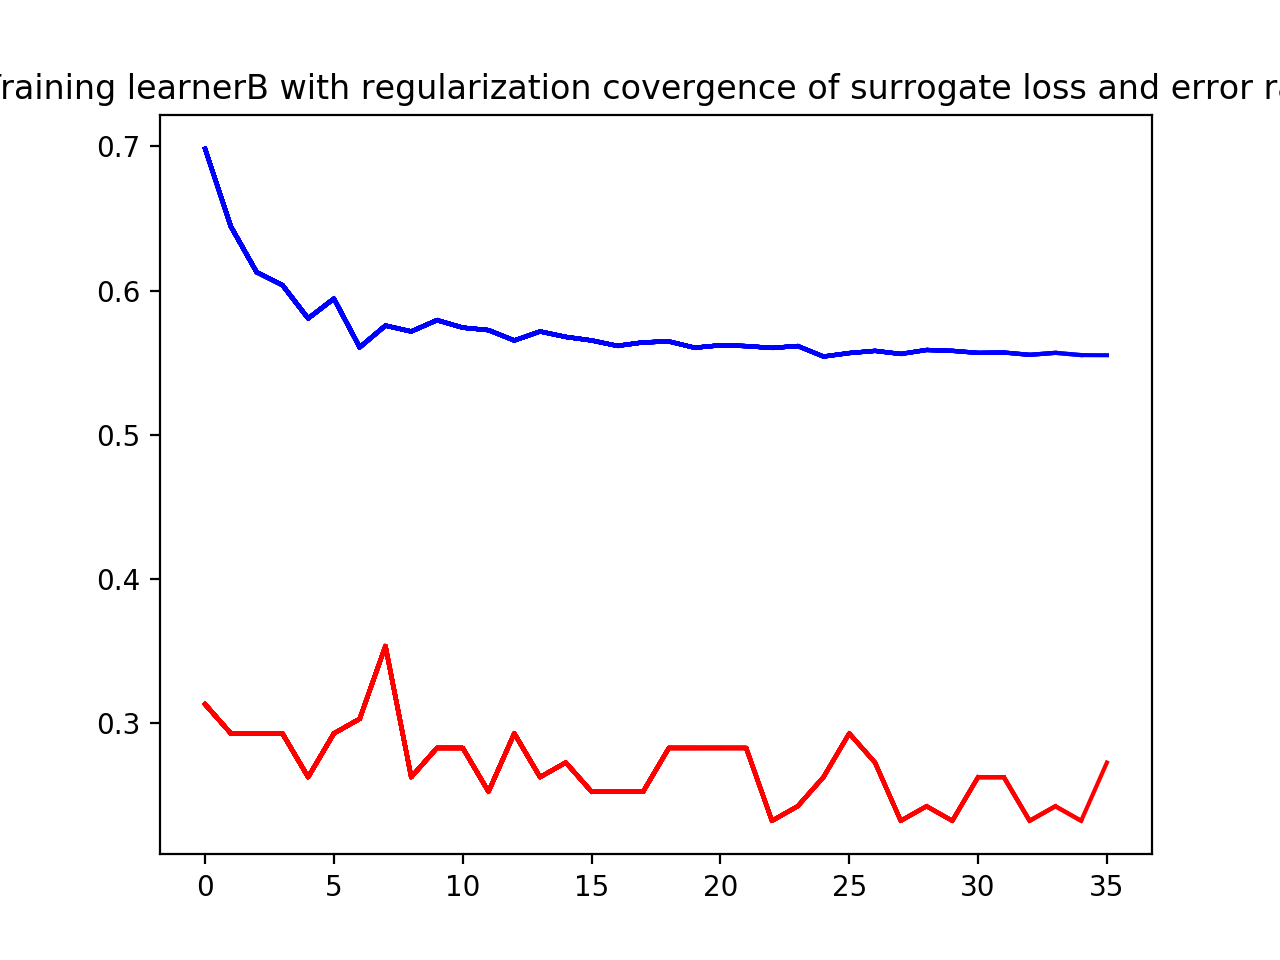

<IPython.core.display.Javascript object>


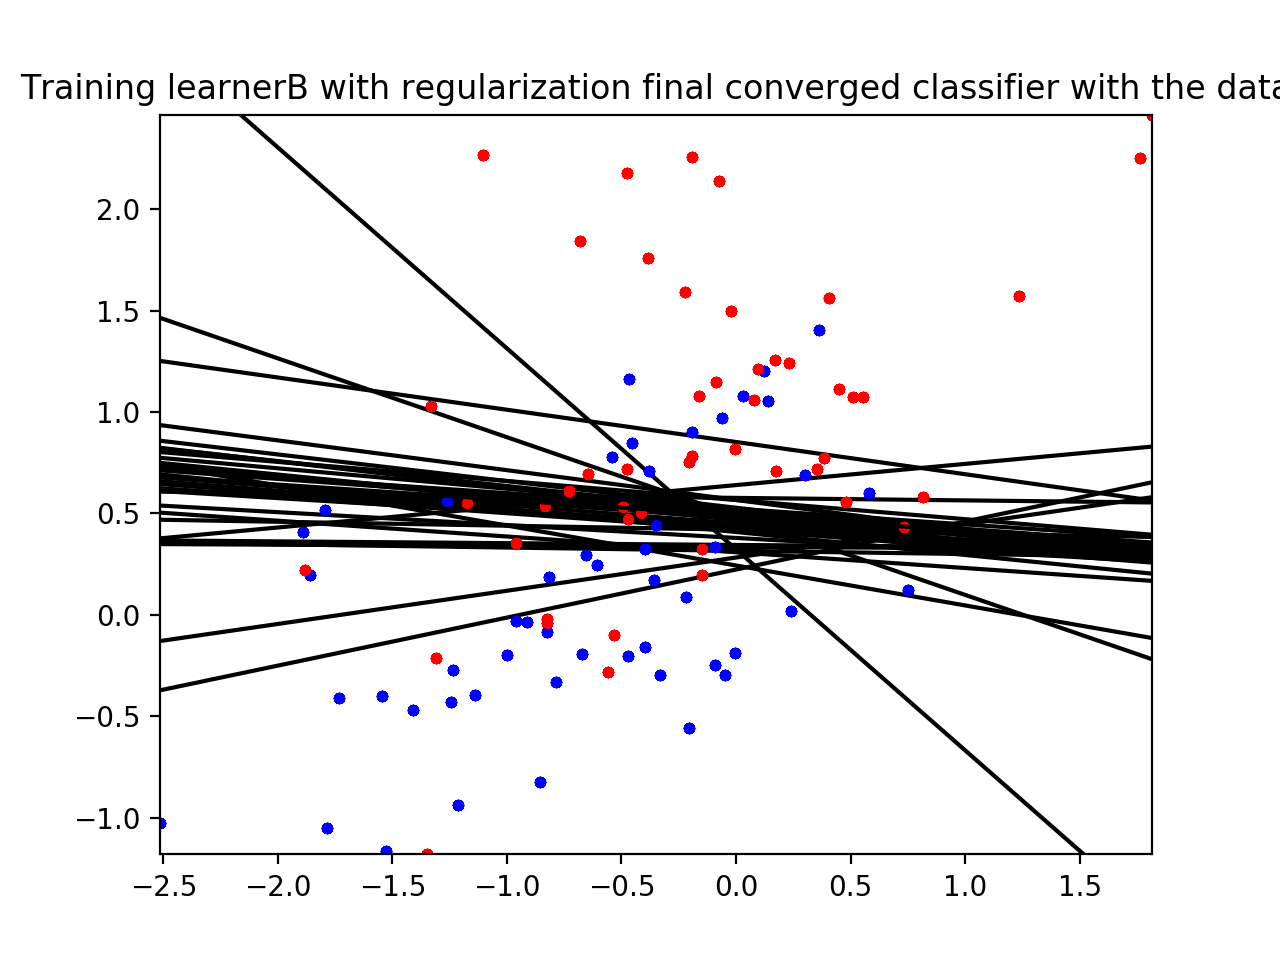

Training learnerB stopped at epoch:  36
Trained theta from learnerB with regularization:  [-0.80132069  0.12351175  1.63156597]


In [1]:
%matplotlib notebook
#%matplotlib inline
#used to plot in jupyter

import mltools as ml
import sys
import numpy as np
import matplotlib.pyplot as plt
from logisticClassify2 import *

iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]  # get first two features & target
X,Y = ml.shuffleData(X,Y)  # reorder randomly (important later)
X,_ = ml.transforms.rescale(X)  # works much better on rescaled data
XA, YA = X[Y<2,:], Y[Y<2]  # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0]  # get class 1 vs 2
plt.figure('1.1 Scattered data points for XA, YA')
plt.title('1.1 Scattered data points for XA, YA')
plt.scatter(XA[:,:1], YA, color = 'r')
plt.scatter(XA[:,1:], YA, color = 'b')
plt.figure('1.1 Scattered data points for XB, YB')
plt.title('1.1 Scattered data points for XB, YB')
plt.scatter(XB[:,:1], YB, color = 'r')
plt.scatter(XB[:,1:], YB, color = 'b')
#1.1 done

learnerA = logisticClassify2() # create "blank"learner
learnerA.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]) # TODO: fill in values
learnerA.theta = wts # set the learner’s parameters
plt.figure('1.2 plot Boundary for XA, YA')
plt.title('1.2 plot Boundary for XA, YA')
learnerA.plotBoundary(XA, YA)

learnerB = logisticClassify2() # create "blank"learner
learnerB.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]) # TODO: fill in values
learnerB.theta = wts # set the learner’s parameters
plt.figure('1.2 plot Boundary for XB, YB')
plt.title('1.2 plot Boundary for XB, YB')
learnerB.plotBoundary(XB, YB)
#1.2 done

YhatA = learnerA.predict(XA)
YhatB = learnerB.predict(XB)
print('1.3 error for set A: ', learnerA.err(XA, YA))
print('1.3 error for set B: ', learnerB.err(XB, YB))
#1.3 done

plt.figure('1.4 verifing learnerA by plot on XA, YA')
plt.title('1.4 verifing learnerA by plot on XA, YA')
ml.plotClassify2D(learnerA, XA, YA)
plt.figure('1.4 verifing learnerB by plot on XB, YB')
plt.title('1.4 verifing learnerB by plot on XB, YB')
ml.plotClassify2D(learnerB, XB, YB)
#1.4 done

learnerA.train(XA,YA,plotname = "Training learnerA")
print('Trained theta from learnerA: ', learnerA.theta)
learnerB.train(XB,YB,plotname = "Training learnerB")
print('Trained theta from learnerB: ', learnerB.theta)
#1.7 done

learnerA.train(XA,YA,plotname = "Training learnerA",regularization=True,alpha = 0.05)
print('Trained theta from learnerA with regularization: ', learnerA.theta)
learnerB.train(XB,YB,plotname = "Training learnerB",regularization=True,alpha = 0.05)
print('Trained theta from learnerB with regularization: ', learnerB.theta)
#extra done

# Problem 2
- 1  
Since there is no x2 in the function, its basically a vertical line classifier. It can shatter 2 data points but not three, therefore a,b can be shattered and VC dimension is 2
- 2  
This is a line classifier with no offset and a^2b/c slope. This line must go through (0,0). Under this condition, it cannot shatter 3 data points in c, therefore, a,b can be shattered and VC dimension is 2
- 3  
This is a circle classifier origin at (a,b) with radius root(c). It can scatter 3 data points but not some position settings of 4 data points. Therefore, a,b,c can be shattered and VC dimension is 3
- 4  
this is a classifier with 2 parallel lines. since a line with all parameters available can shatter 3 data points, 2 parallel lines then can easily shatter 4 data points for sure. just randome pick 3 points and shatter with 1 line then move the second line to shatter the 4th point if needed. Therefore, a,b,c,d can be shattered and VC dimension is at least 4.